In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'


In [2]:
def prcrng(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import signal as sg
from datetime import datetime as dt
import xarray as xr

In [4]:
dir_acs = "/users/rsg/spa/spapapers/Pardo_Globlal_Chla/insitu/reprocessing/netCDF/SeaBASS2022/"
fn_acs = "GP506.nc"

In [5]:
# read ACS (and HPLC) data in xr format

acs = xr.open_dataset(dir_acs + fn_acs)

# check keys
print(acs.keys())

#check attributes
acs['acs_chl'].attrs

print(len(acs.hplc_time))
print(len(acs.time))

KeysView(<xarray.Dataset>
Dimensions:         (time: 486, hplc_time: 72, acs_wv: 176)
Coordinates:
  * time            (time) datetime64[ns] 2006-08-25T23:15:00 ... 2006-09-20T...
  * hplc_time       (hplc_time) datetime64[ns] 2006-08-20T02:58:00 ... 2006-0...
  * acs_wv          (acs_wv) float64 400.0 402.0 404.0 ... 746.0 748.0 750.0
Data variables:
    hplc_lat        (hplc_time) float64 ...
    hplc_lon        (hplc_time) float64 ...
    hplc_Tot_Chl_a  (hplc_time) float64 ...
    uway_lat        (time) float64 ...
    uway_lon        (time) float64 ...
    acs_chl         (time) float64 ...
    acs_ap          (time, acs_wv) float64 ...)
72
486


['2006-08-25T23:15:00.000000000' '2006-08-26T00:15:00.000000000'
 '2006-08-26T01:15:00.000000000' '2006-08-26T02:15:00.000000000'
 '2006-08-26T03:15:00.000000000' '2006-08-26T04:15:00.000000000'
 '2006-08-26T05:15:00.000000000' '2006-08-26T06:15:00.000000000'
 '2006-08-26T07:15:00.000000000' '2006-08-26T08:15:00.000000000'
 '2006-08-26T09:15:00.000000000' '2006-08-26T10:15:00.000000000'
 '2006-08-26T11:15:00.000000000' '2006-08-26T12:15:00.000000000'
 '2006-08-26T13:15:00.000000000' '2006-08-26T14:15:00.000000000'
 '2006-08-26T15:15:00.000000000' '2006-08-26T16:15:00.000000000'
 '2006-08-26T17:15:00.000000000' '2006-08-26T18:15:00.000000000'
 '2006-08-26T19:15:00.000000000' '2006-08-26T20:15:00.000000000'
 '2006-08-26T21:15:00.000000000' '2006-08-26T22:15:00.000000000'
 '2006-08-26T23:15:00.000000000' '2006-08-27T00:15:00.000000000'
 '2006-08-27T01:15:00.000000000' '2006-08-27T02:15:00.000000000'
 '2006-08-27T03:15:00.000000000' '2006-08-27T04:15:00.000000000'
 '2006-08-27T08:15:00.000

Text(0, 0.5, 'lon')

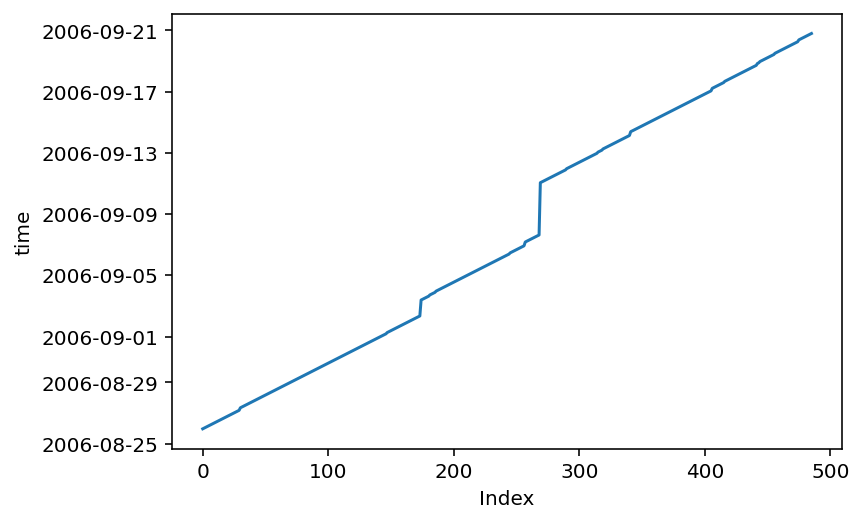

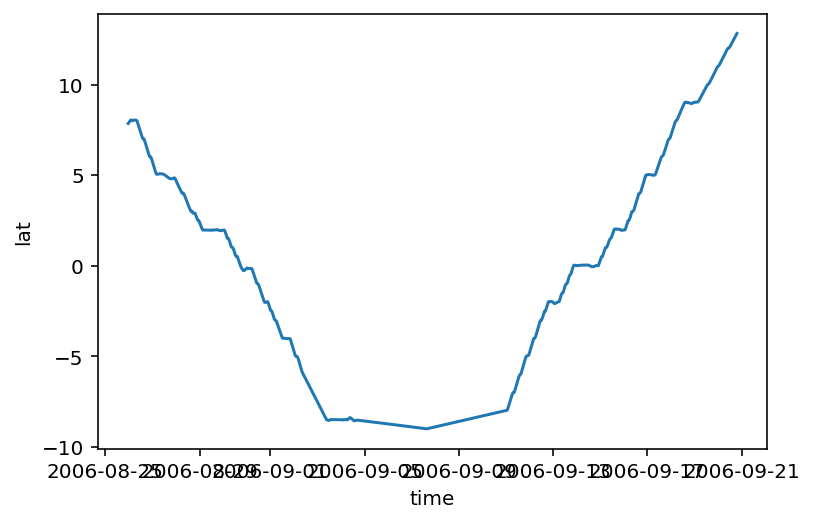

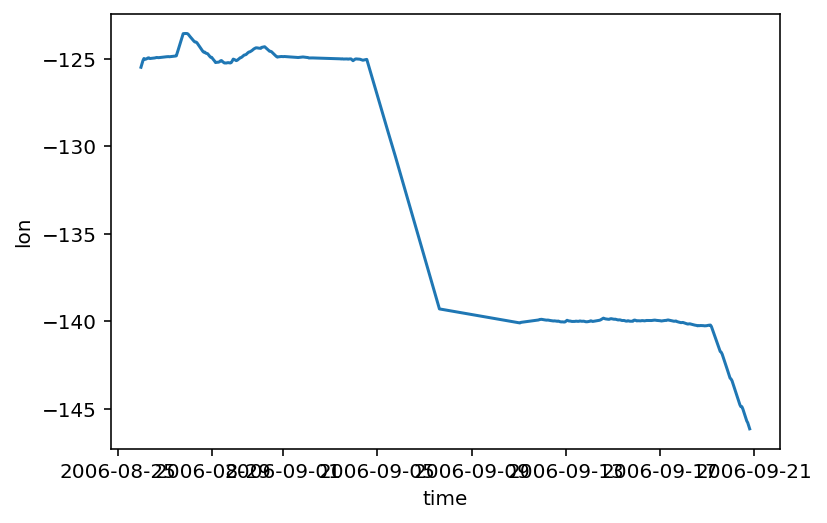

In [6]:
# test plot of lat & lons versus time
plt.figure()
plt.plot(acs.time)
plt.xlabel('Index')
plt.ylabel('time')
print(acs.time.values)


plt.figure()
plt.plot(acs.time,acs.uway_lat)
plt.xlabel('time')
plt.ylabel('lat')

plt.figure()
plt.plot(acs.time,acs.uway_lon)
plt.xlabel('time')
plt.ylabel('lon')

# note - data is too patchy for median fillter - maybe there was already some kind of gridding?


In [7]:
  
    # check temporal sample rate
plt.figure()
delta_t = np.median(np.diff(acs.time))
print(delta_t)
print(str(int(delta_t/10**9)) + ' secs')
    
    plt.rcParams.update({'font.size': 16})

3600000000000 nanoseconds
3600 secs


<Figure size 432x288 with 0 Axes>

['hplc_lat', 'hplc_lon', 'hplc_Tot_Chl_a', 'uway_lat', 'uway_lon', 'acs_chl', 'acs_ap']


/tmp/ipykernel_793152/2523144477.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl*(0.72), kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', color='red', alpha = 0.5, label='AC9: adjusted')


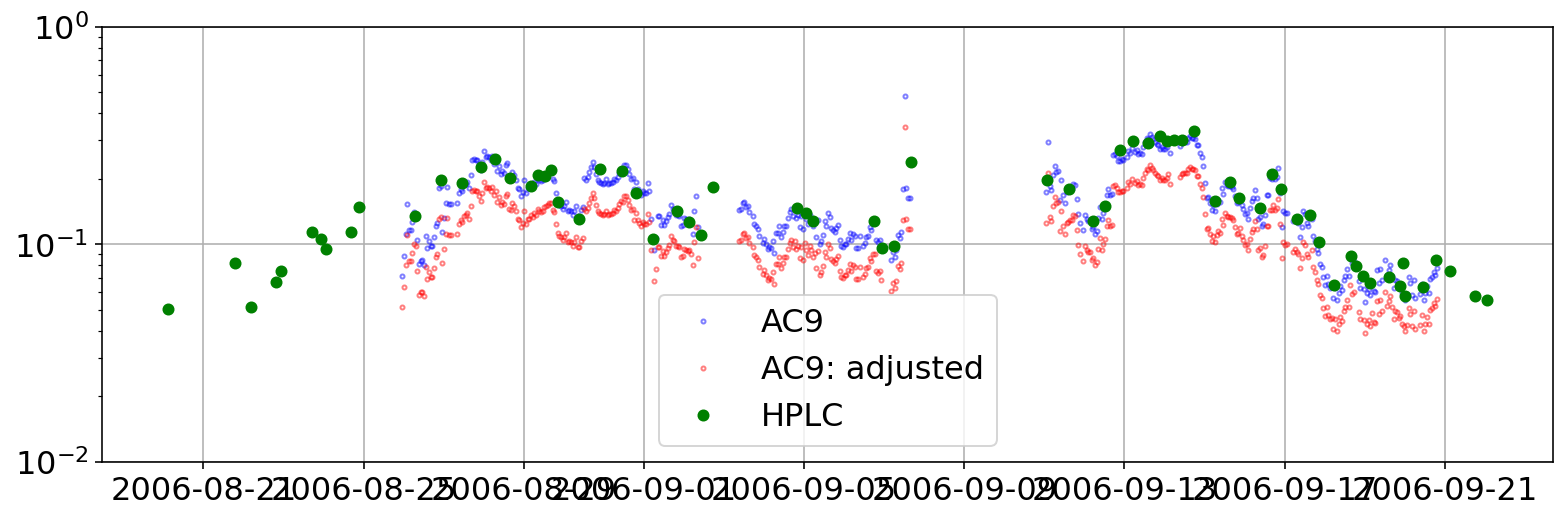

In [8]:
# Test plot of ACS(9) and HPLC Chl prior to match-up
# include emprical adjustment of AC9 chl using AMT
MEDFILT_WIN = 1 # window length of med filter in minutes - note: this assumes data has been binned at 1 minute. In this case 

#
fig2, ax2 = plt.subplots(1, figsize=(13, 4))
ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl, kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', alpha = 0.5, label='AC9')
ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl*(0.72), kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', color='red', alpha = 0.5, label='AC9: adjusted')
ax2.grid('on')
plt.legend()
plt.ylim([1e-2, 1])


print(list(acs.keys()))
ax2.semilogy(acs.hplc_time, acs.hplc_Tot_Chl_a, 'go', ms=5, alpha=1, label='HPLC')#, mfc='none')
#a2.semilogy(df_CTD.index, df_CTD.Tot_Chl_a, 'ko', ms=7, alpha=1, mfc='none', zorder=60)
#ax2.scatter(df_CTD.index, df_CTD.Tot_Chl_a, c=df_CTD.Bottle.values, s=30, alpha=1, zorder=60, cmap = plt.get_cmap('inferno'), vmin=2, vmax=24)
#ax2.semilogy(df_UND.index, df_UND.Tot_Chl_a, 'ks', ms=7, alpha=0.85, mfc='c')
plt.legend()
#########

# looks like adjustment had already been applied?

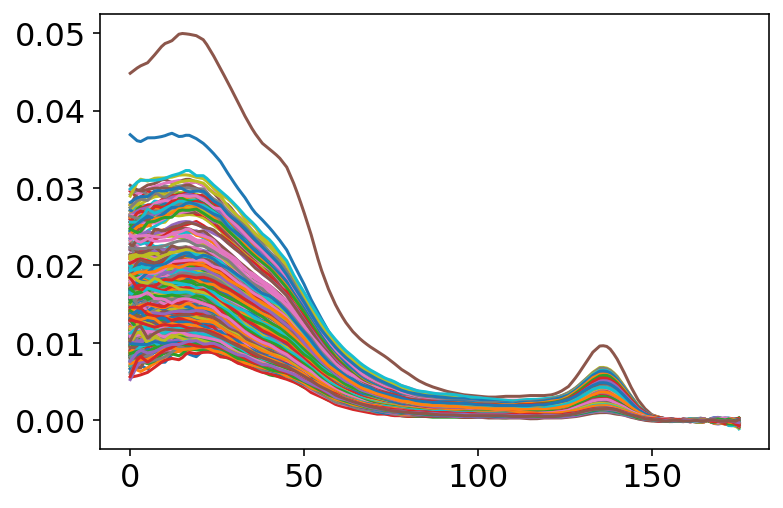

In [9]:
plt.figure()
plt.plot(acs.acs_ap.T)

# note - looks like an ACS! (that makes sense)

486


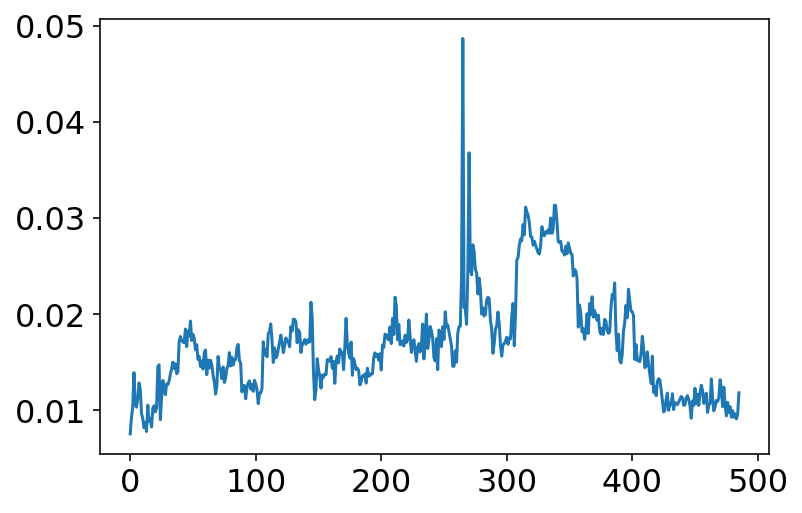

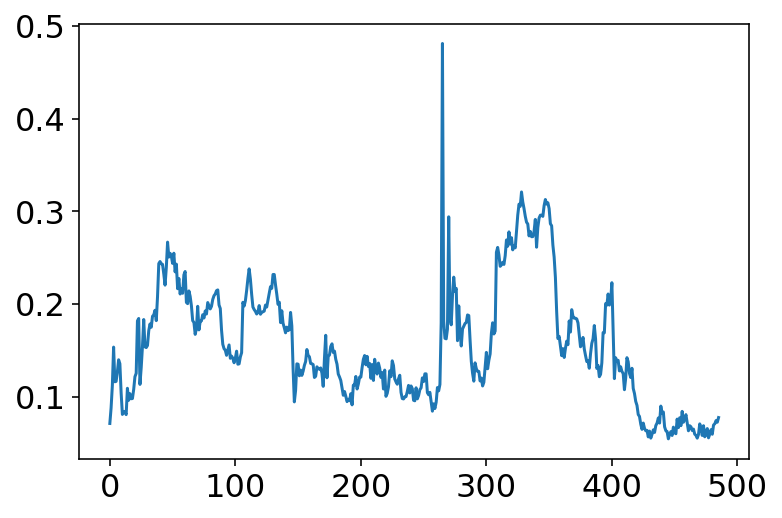

In [10]:
# df_hplc_surf = df_hplc_surf
# merge HPCL and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
# here made with dataframe instead of series

# averages duplicate values
#df_hplc_surf = df_hplc_surf.groupby('time').mean() 

#step x - # filters w.r.t. i2fn (mQ interval + previous manual spike removal) and innan
#plt.figure()
#acs['acs_chl'].values = sg.medfilt(acs.acs_chl, kernel_size = MEDFILT_WIN) # apply med filter to acx chl and acx chl debiasesd 
#plt.plot(acs['acs_chl'].values)

#step y - # filters w.r.t. ap (10the element) being > 0
plt.plot(acs.acs_ap[:,10]) # all data passes QC - there were issues due to non-unique elemnts, but it does matter
#i2kp = np.where((acs.acs_ap[:,10] > 0)) [0]
#iy = xr.DataArray(acs.time[i2kp], dims=['time']) 
#acs = acs.sel(time = iy)

#step z - # filters w.r.t. acs chl being > 0
plt.figure()
plt.plot(acs['acs_chl'].values) # all data passes QC - ther were issues due to non-unique elemnts, but it does matter
#i2kp = np.where((acs.acs_ap[:,10] > 0)) [0]) [0]
#iz = xr.DataArray(acs_filtered_xy.time[i2kp], dims=['time']) 
#acs_filtered_xyz = acs_filtered_xy.sel(time = iz)
#plt.plot(acs_filtered_xyz['acs_chl'].values)


print(len(acs['acs_chl'].values))

In [11]:

print(len(acs['acs_chl'].values))

486


In [12]:
# match-ups #
# create serier objects
df_hplc = pd.Series(acs['hplc_Tot_Chl_a'].values ,index = acs.hplc_time)
df_acs = pd.Series(acs['acs_chl'].values, index = acs.time)

# filter
df_hplc = df_hplc.groupby(df_hplc.index).mean() 
df_acs = df_acs.groupby(df_acs.index).mean() 

df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc, 'acs_chl': df_acs})
#df_hplc_acs = df_hplc_acs.interpolate('index',limit=1).reindex(df_hplc_acs.index,method='nearest',tolerance='30min')
df_hplc_acs = df_hplc_acs.interpolate('index').reindex(df_hplc.index,method='nearest',tolerance='30min') 

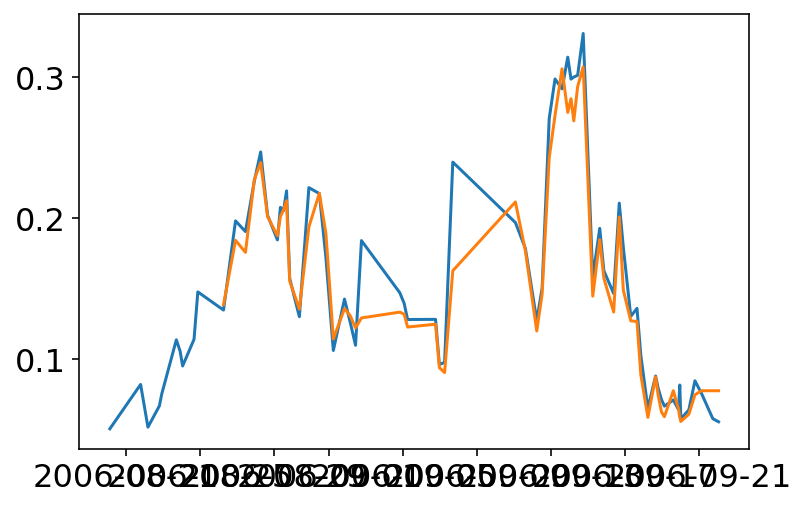

In [13]:
plt.figure()
plt.plot(df_hplc_acs)



In [14]:
#df_hplc_surf_new = df_hplc_surf
# merge HPCL and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
# here made with dataframe instead of series

# averages duplicate values
#df_hplc_surf_new = df_hplc_surf_new.groupby('time').mean() 

# create pandas series with medfilt ACS data
#df_acs = pd.Series(sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=31), index = acs.time.values[i2f][innan])
#df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc_surf_new.Tot_Chl_a, 'acs_chl': df_acs})
#df_hplc_acs = df_hplc_acs.interpolate('index').reindex(df_hplc_surf_new.index)
    


-0.03696714298275078 0.06806498794459434 62
0.021751849088813224 0.03920130870855093 62


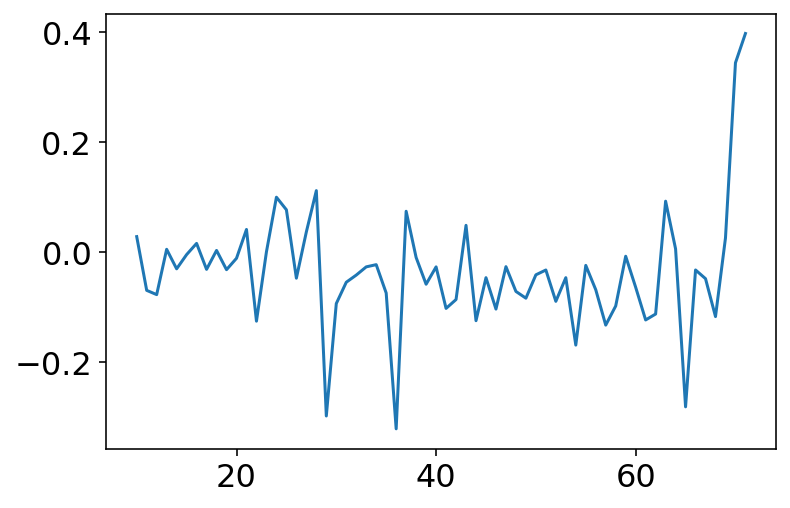

In [15]:
# compute residuals and stats (lin and log space)
rres = df_hplc_acs.acs_chl.values / df_hplc_acs.Tot_Chl_a.values - 1
rres = df_hplc_acs.acs_chl.values / df_hplc_acs.Tot_Chl_a.values - 1 # with empircal adjustment


rres_log = np.log10(df_hplc_acs.acs_chl.values) / np.log10(df_hplc_acs.Tot_Chl_a.values) - 1
rres_log = np.log10(df_hplc_acs.acs_chl.values) / np.log10(df_hplc_acs.Tot_Chl_a.values) - 1

delta = np.nanmedian(rres)
delta_log = np.nanmedian(rres_log)
sigma = prcrng(rres)
sigma_log = prcrng(rres_log)
N = np.sum(~np.isnan(rres))

print(delta, sigma, N)

print(delta_log, sigma_log, N)

plt.figure()
plt.plot(rres)

In [16]:

print(rres)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan  0.02820568 -0.06962593
 -0.07738395  0.00508945 -0.03042911 -0.00456014  0.01585905 -0.03143443
  0.00306884 -0.03196619 -0.0112383   0.04124602 -0.12571129  0.00048886
  0.09996103  0.07703681 -0.04747919  0.03685594  0.11193738 -0.29829944
 -0.09366868 -0.0548409  -0.04180288 -0.0268582  -0.02282097 -0.07446211
 -0.32167659  0.07434873 -0.00980402 -0.05848019 -0.02690652 -0.10248279
 -0.08632018  0.04872918 -0.12484663 -0.04654182 -0.10368555 -0.02650009
 -0.07157458 -0.0838666  -0.04135937 -0.03257492 -0.08957651 -0.04654618
 -0.16926428 -0.02417891 -0.06845107 -0.13286037 -0.09803118 -0.00752795
 -0.0640055  -0.12349156 -0.11269674  0.09269927  0.00583048 -0.28163926
 -0.03248999 -0.04835327 -0.11739825  0.02577491  0.34454872  0.39794235]


<xarray.DataArray 'time' (time: 486)>
array(['2006-08-25T23:15:00.000000000', '2006-08-26T00:15:00.000000000',
       '2006-08-26T01:15:00.000000000', ..., '2006-09-20T17:15:00.000000000',
       '2006-09-20T18:15:00.000000000', '2006-09-20T19:15:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-08-25T23:15:00 ... 2006-09-20T19:15:00

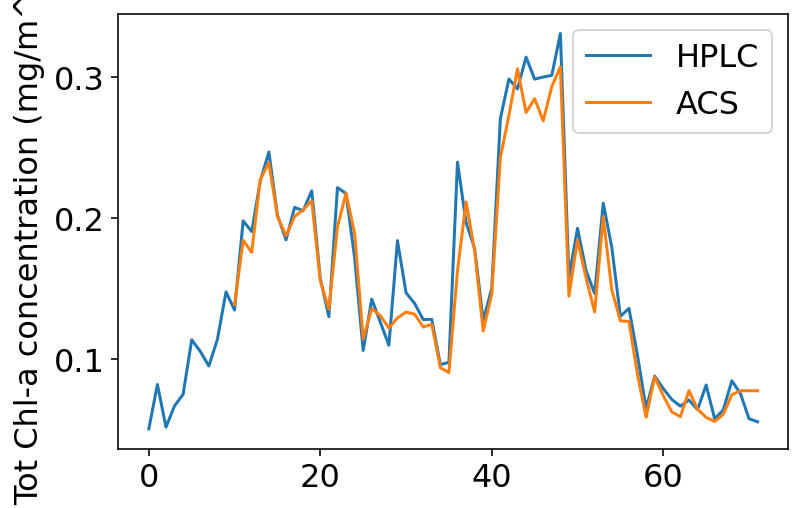

In [17]:
plt.figure()
plt.plot(df_hplc_acs.Tot_Chl_a.values,label='HPLC')
plt.plot(df_hplc_acs.acs_chl.values,label='ACS')
plt.ylabel('Tot Chl-a concentration (mg/m^3)')
#plt.xlabel('Sample index')
plt.legend()

acs.time



['hplc_lat', 'hplc_lon', 'hplc_Tot_Chl_a', 'uway_lat', 'uway_lon', 'acs_chl', 'acs_ap']


/tmp/ipykernel_793152/3371653749.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax2.semilogy(df_hplc.index, df_hplc.values, 'go', ms=5, color='green', alpha=1, label='HPLC_all')#, mfc='none')
/tmp/ipykernel_793152/3371653749.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax2.semilogy(df_hplc_acs.index[~np.isnan(rres)==1], df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1], 'go', ms=5, color='red', alpha=1, label='HPLC matches')#, mfc='none')


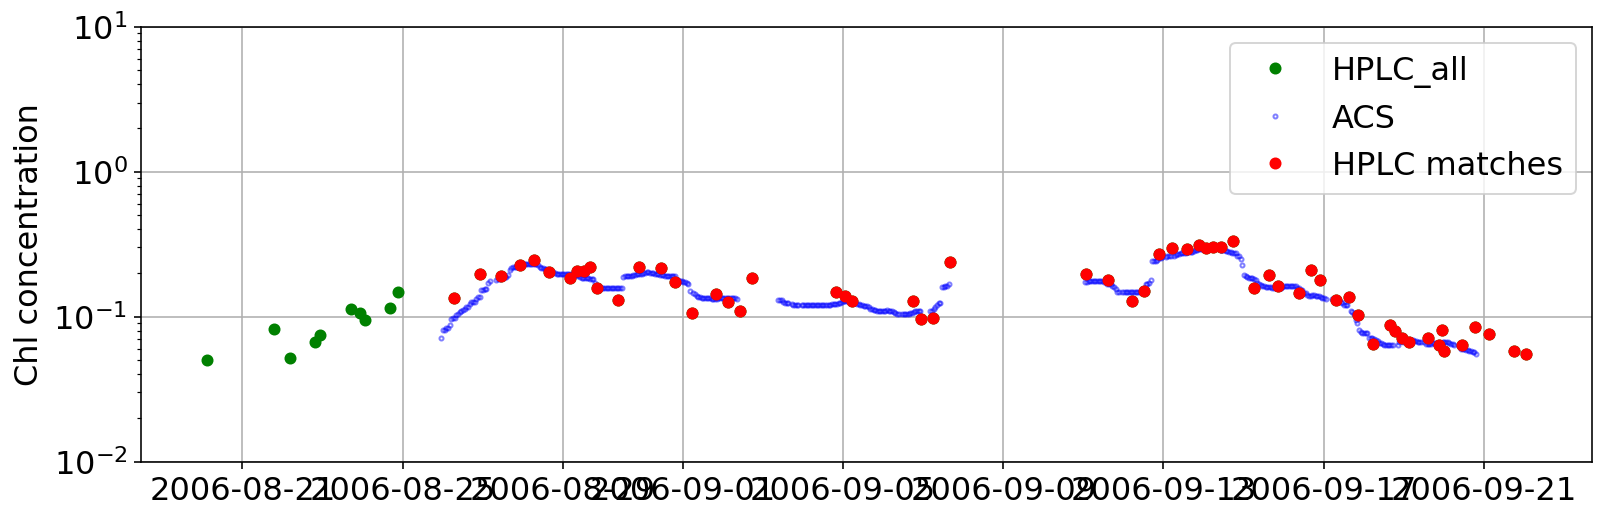

In [18]:
MEDFILT_WIN = 31 # window length of med filter in minutes - note: this assumes data has been binned at 1 minute. 

#
fig2, ax2 = plt.subplots(1, figsize=(13, 4))
ax2.semilogy(df_hplc.index, df_hplc.values, 'go', ms=5, color='green', alpha=1, label='HPLC_all')#, mfc='none')
ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl, kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', alpha = 0.5, label='ACS')
ax2.grid('on')
plt.legend()
plt.ylim([1e-2, 10])
plt.ylabel('Chl concentration')

print(list(acs.keys()))
ax2.semilogy(df_hplc_acs.index[~np.isnan(rres)==1], df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1], 'go', ms=5, color='red', alpha=1, label='HPLC matches')#, mfc='none')
plt.legend()
#########



[0.0504 0.0819 0.0516 0.0667 0.0749 0.1136 0.1054 0.095  0.1139 0.1476
 0.1347 0.198  0.1904 0.2263 0.2469 0.202  0.1845 0.2076 0.2052 0.2193
 0.1571 0.13   0.2216 0.2174 0.172  0.106  0.1425 0.1261 0.1097 0.184
 0.147  0.1394 0.128  0.1281 0.096  0.0976 0.2397 0.1968 0.1785 0.1273
 0.1502 0.2706 0.2987 0.2917 0.3142 0.2986 0.3001 0.3013 0.331  0.1578
 0.1927 0.1627 0.1464 0.2106 0.1792 0.1302 0.1359 0.1024 0.0649 0.0879
 0.079  0.0712 0.0665 0.0709 0.064  0.0815 0.0575 0.0638 0.0845 0.0755
 0.0576 0.0554]


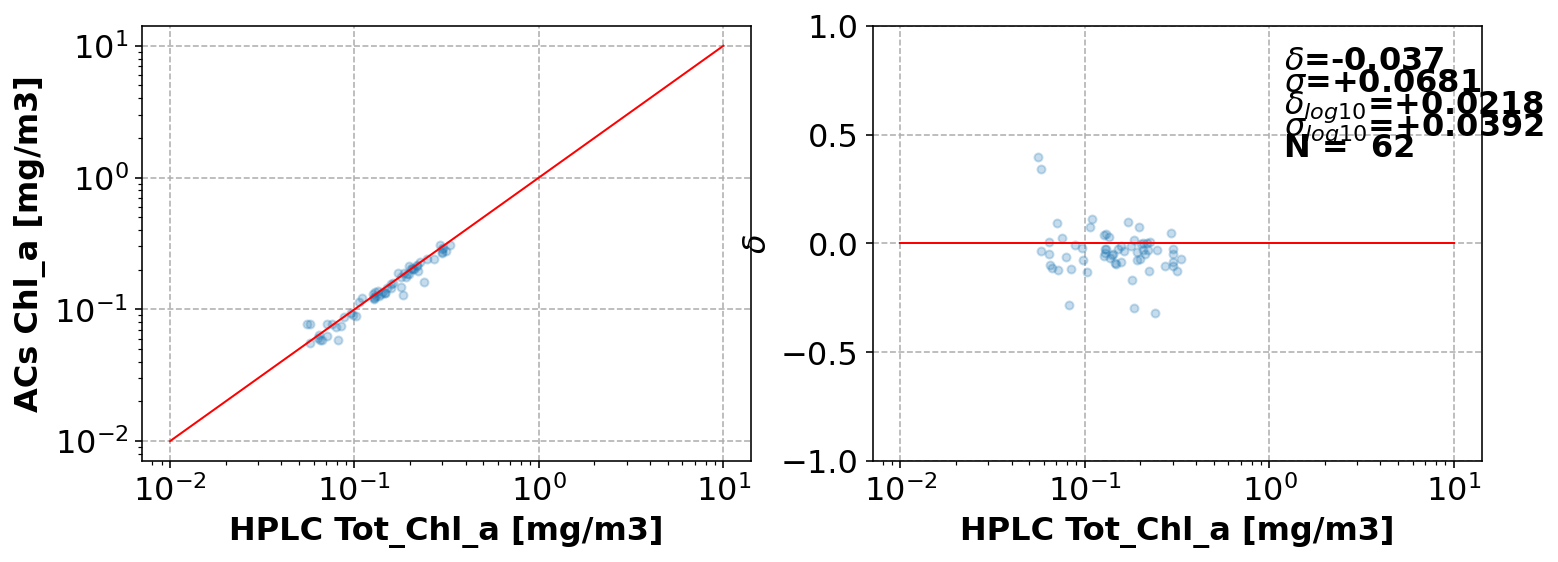

In [19]:


fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].loglog(df_hplc_acs.Tot_Chl_a.values, df_hplc_acs.acs_chl.values, 'o', ms=4, alpha=0.25)
x = np.logspace(np.log10(0.01), np.log10(10), 100)
ax[0].loglog(x, x, 'r-', lw=1)
ax[0].grid('on', ls='--')
ax[0].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[0].set_ylabel('ACs Chl_a [mg/m3]', fontweight='bold')

ax[1].semilogx(df_hplc_acs.Tot_Chl_a.values, rres, 'o', ms=4, alpha=0.25)
ax[1].semilogx(x, x*0, 'r-', lw=1)
ax[1].grid('on', ls='--')
ax[1].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[1].set_ylabel('$\delta$', fontweight='bold')
ax[1].set_ylim([-1, 1])
ax[1].text(1.2, 0.8, r'$\delta$='+f'{delta:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.7, r'$\sigma$='+f'{sigma:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.6, r'$\delta_{log10}$='+f'{delta_log:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.5, r'$\sigma_{log10}$='+f'{sigma_log:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.4, f'N = {N: 0}', fontweight='bold')




print(df_hplc_acs.Tot_Chl_a.values)



(-1.0, 1.0)

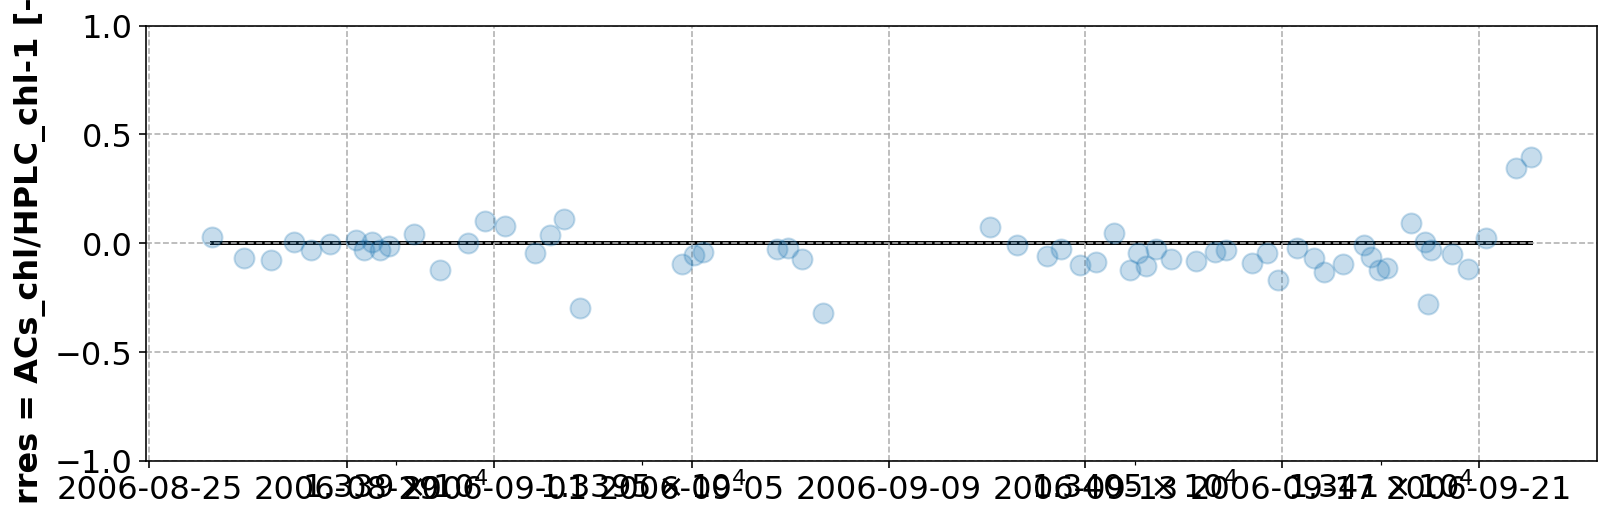

In [20]:
fig, ax = plt.subplots(1,1, figsize=(13, 4))
ax.semilogx(df_hplc_acs.index.values, rres, 'o', ms=10, alpha=0.25, zorder=60)
ax.plot(df_hplc_acs.index.values, rres*0, 'k-', lw=2, zorder=1)
ax.set_ylabel('rres = ACs_chl/HPLC_chl-1 [-]', fontweight='bold')
ax.grid('on', ls='--')
ax.set_ylim([-1, 1])

In [21]:
# as previous but apply log transform prior to fitting
import scipy

linear_mod = scipy.stats.linregress(np.log10(0.014*0.72*df_hplc_acs.acs_chl.values[np.isnan(df_hplc_acs.acs_chl)==0]), np.log10(df_hplc_acs.Tot_Chl_a.values[np.isnan(df_hplc_acs.acs_chl)==0]))


A = np.round(100*linear_mod.intercept)/100
B = np.round(1000*linear_mod.slope)/1000
r_sq = np.round(1000*linear_mod.rvalue**2)/100

r_sq = np.round(1000*linear_mod.rvalue**2)/1000
stderr = np.round(1000*linear_mod.stderr)/1000
interr = np.round(1000*linear_mod.intercept_stderr)/1000


print('A = ' + str(10**A) + ' +/- ' + str(2*10**interr))
print('B = ' + str(B) + ' +/- ' + str(2*stderr))

print(r_sq)


A = 107.1519305237606 +/- 2.4435993203297435
B = 1.006 +/- 0.06
0.948


In [22]:
# de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
acs['acs_chl_debiased_nomedfilt'] = acs.acs_chl*(1-delta)


# acs_out = pd.DataFrame(data = {'lat [degN]': acs.uway_lat[i2f][innan],
#                              'lon [degE]': acs.uway_lon[i2f][innan],
#                             'acs_chl_debiased [mg_m3]': acs.acs_chl_debiased[i2f][innan]
#                           }  ,
# index = acs.time.values[i2f][innan])

In [23]:
# de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
# add attributes to acs_chl_debiased #
acs.acs_chl_debiased_nomedfilt.attrs["debiasing_equation"] = "acs.acs_chl_debiased = acs.acs_chl*(1-delta)"
acs.acs_chl_debiased_nomedfilt.attrs["delta"] = delta
acs.acs_chl_debiased_nomedfilt.attrs["sigma"] = sigma
acs.acs_chl_debiased_nomedfilt.attrs["units"] = "mg/m3"
acs.acs_chl_debiased_nomedfilt.attrs["comments"] = "delta=np.nanmedian(rres), sigma=prcrng(rres), rres=acs_chl/HPLC_Tot_Chl_a-1, based on surface data"
acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla"] = df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1].values  # filter nans
acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla_units"] = "mg/m3"
acs.acs_chl_debiased_nomedfilt.attrs["acs_chl"] = df_hplc_acs[~np.isnan(rres)==1].acs_chl.values # filter nans
acs.acs_chl_debiased_nomedfilt.attrs["acs_chl_units"] = "mg/m3"
acs.acs_chl_debiased_nomedfilt.attrs["processed_on"] = dt.now().strftime("%Y-%m-%d %H:%M:%S.%f")
acs.acs_chl_debiased_nomedfilt.attrs["match_up_dates"] = df_hplc_acs[~np.isnan(rres)==1].index.format()

In [27]:


len(acs.acs_chl_debiased_nomedfilt.attrs["match_up_dates"])
len(acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla"])

62

In [28]:
print('max/min conc range for results table')
print(np.min(acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla"]))
print(np.max(acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla"])) # quote min max of matc

max/min conc range for results table
0.0554
0.331


In [29]:
# save updated NetCDF file
dir_acs_out = '/data/datasets/cruise_data/active/ACS_Chl/Glob_OC_matchups/Debiased_nc/'
acs.to_netcdf(dir_acs_out + fn_acs[:-3] + '_with_debiased_chl.nc')
acs.close()